In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

root_path = 'drive/MyDrive/NBA-predictions'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Neural Network Model 1: 

This model will ONLY use the last 5 games' average stats, while knowing nothing about who the teams are, to try and predict the winner.





In [3]:
train_data = pd.read_csv(root_path +'/data/train_data_ppmadf.csv')
test_data= pd.read_csv(root_path +'/data/test_data_ppmadf.csv')

X_train = train_data.drop(columns=['HOME_WIN'])
y_train = train_data['HOME_WIN']

X_test = test_data.drop(columns=['HOME_WIN'])
y_test = test_data['HOME_WIN']

In [4]:
cols_to_drop = [
                'AWAY_RA_AST',
                'HOME_RA_AST',
                'AWAY_RA_BLK',
                'HOME_RA_BLK',
                'AWAY_RA_DREB',
                'HOME_RA_DREB',
                'AWAY_RA_FG3A',
                'HOME_RA_FG3A',
                'AWAY_RA_FGA',
                'HOME_RA_FGA',
                'AWAY_RA_FGM',
                'HOME_RA_FGM',
                'AWAY_RA_FG3M',
                'HOME_RA_FG3M',
                'AWAY_RA_OREB',
                'HOME_RA_OREB',
                'AWAY_RA_FTA',
                'HOME_RA_FTA',
                'AWAY_RA_FTM',
                'HOME_RA_FTM',
                'AWAY_RA_PF',
                'HOME_RA_PF',
]

# drop the team abbreviation columns for both HOME and AWAY teams
for i in X_train.columns[:60]:
  cols_to_drop.append(i)

X_train_revised = X_train.drop(columns=cols_to_drop)
X_test_revised = X_test.drop(columns=cols_to_drop)

In [5]:
X_train_revised

,AWAY_RA_FG3_PCT,AWAY_RA_FG_PCT,AWAY_RA_FT_PCT,AWAY_RA_PLUS_MINUS,AWAY_RA_PTS,AWAY_RA_REB,AWAY_RA_STL,AWAY_RA_TOV,HOME_RA_FG3_PCT,HOME_RA_FG_PCT,HOME_RA_FT_PCT,HOME_RA_PLUS_MINUS,HOME_RA_PTS,HOME_RA_REB,HOME_RA_STL,HOME_RA_TOV
0,0.435316,0.333333,0.615542,0.468619,0.330396,0.531915,0.129630,0.460526,0.588902,0.472141,0.585456,0.704120,0.346491,0.536232,0.275862,0.636364
1,0.616800,0.503727,0.570041,0.761506,0.378855,0.574468,0.333333,0.578947,0.513723,0.530792,0.527601,0.460674,0.429825,0.442029,0.448276,0.610390
2,0.440221,0.561235,0.665133,0.468619,0.348018,0.319149,0.259259,0.565789,0.603222,0.574780,0.585456,0.707865,0.377193,0.528986,0.327586,0.506494
3,0.821582,0.298190,0.750511,0.309623,0.303965,0.347518,0.277778,0.644737,0.534010,0.560117,0.742569,0.779026,0.399123,0.521739,0.310345,0.441558
4,0.435316,0.543131,0.727505,0.707113,0.414097,0.418440,0.222222,0.355263,0.636038,0.475073,0.755308,0.711610,0.381579,0.507246,0.379310,0.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,0.604537,0.387646,0.737730,0.560669,0.568282,0.695035,0.129630,0.276316,0.408115,0.442815,0.667728,0.494382,0.407895,0.528986,0.362069,0.467532
2392,0.546291,0.595314,0.752045,0.841004,0.828194,0.829787,0.314815,0.473684,0.495227,0.264907,0.678344,0.370787,0.289474,0.420290,0.241379,0.285714
2393,0.652361,0.497338,0.390593,0.439331,0.334802,0.347518,0.425926,0.328947,0.580549,0.605083,0.317410,0.666667,0.548246,0.514493,0.103448,0.220779
2394,0.331698,0.312034,0.516360,0.514644,0.290749,0.510638,0.407407,0.355263,0.381265,0.390029,0.414013,0.561798,0.434211,0.710145,0.396552,0.259740


In [6]:
# create model
model = Sequential()
model.add(Dense(64, input_dim=16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
callbacks = [EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5000, verbose=1,
    mode='auto', baseline=None, restore_best_weights=True
),
ModelCheckpoint(
    filepath=(root_path + '/data/neural_network_checkpoint_2'),
    monitor='val_accuracy',
    mode='auto',
    save_best_only=True)
]

In [8]:
history = model.fit(X_train_revised, y_train, validation_data=(X_test_revised, y_test), batch_size=5, epochs=2500, 
                    steps_per_epoch=60, 
                    verbose=1, callbacks=callbacks)

Streaming output truncated to the last 5000 lines.
60/60 [==============================] - 1s 14ms/step - loss: 0.6876 - accuracy: 0.5333 - val_loss: 0.6748 - val_accuracy: 0.6171
Epoch 6/2500
60/60 [==============================] - 1s 14ms/step - loss: 0.6760 - accuracy: 0.5733 - val_loss: 0.6683 - val_accuracy: 0.6285
Epoch 7/2500
60/60 [==============================] - 1s 14ms/step - loss: 0.6681 - accuracy: 0.5833 - val_loss: 0.6694 - val_accuracy: 0.5919
Epoch 8/2500
60/60 [==============================] - 1s 9ms/step - loss: 0.6672 - accuracy: 0.6182 - val_loss: 0.6557 - val_accuracy: 0.6390
INFO:tensorflow:Assets written to: drive/MyDrive/NBA-predictions/data/neural_network_checkpoint_2/assets
Epoch 9/2500
60/60 [==============================] - 1s 9ms/step - loss: 0.6700 - accuracy: 0.6267 - val_loss: 0.6511 - val_accuracy: 0.6366
Epoch 10/2500
60/60 [==============================] - 1s 14ms/step - loss: 0.6510 - accuracy: 0.6533 - val_loss: 0.6497 - val_accuracy: 0.6341


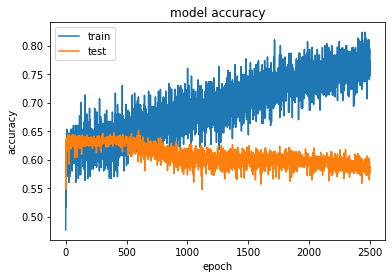

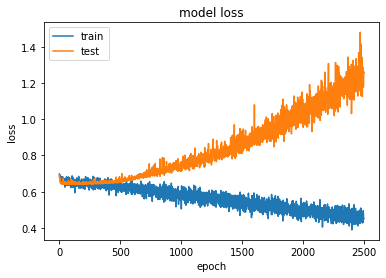

In [9]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
probs = model.predict(X_test_revised)[:,0]
preds_r = np.round(probs,0)
print(accuracy_score(preds_r, y_test))

0.5756097560975609


In [11]:
# nn_df = X_test.copy()
# nn_df['HOME_WIN'] = y_test
# nn_df['PREDS'] = preds_r
# nn_df['ERROR'] = abs(nn_df.HOME_WIN - nn_df.PREDS)

# error_df = nn_df.groupby(by=['ERROR']).sum()

# error_dict = dict()
# for col in error_df.columns:
#   away_col = 'AWAY_' + col
#   val = error_df[col].loc[1] + error_df[away_col].loc[1]
#   error_dict[col] = [val]

# error_total_df = pd.DataFrame.from_dict(error_dict).transpose()
# error_total_df = error_total_df.rename(columns={0:'ERROR_TOTAL'})
# error_total_df.sort_values(by='ERROR_TOTAL', ascending=False)

In [12]:
# error_total_df

In [13]:
model.save(root_path + '/data/neural_network_checkpoint_2')

INFO:tensorflow:Assets written to: drive/MyDrive/NBA-predictions/data/neural_network_checkpoint_2/assets


In [14]:
model_best = models.load_model(root_path + '/data/neural_network_checkpoint')

In [15]:
probs = model_best.predict(X_test_revised)[:,0]
preds_r = np.round(probs,0)
print(accuracy_score(preds_r, y_test))

0.6520325203252032


In [16]:
nn_df = X_test.copy()
nn_df['HOME_WIN'] = y_test
nn_df['PREDS'] = preds_r
nn_df['ERROR'] = abs(nn_df.HOME_WIN - nn_df.PREDS)

error_df = nn_df.groupby(by=['ERROR']).sum()

error_dict = dict()
for col in error_df.columns[:30]:
  away_col = 'AWAY_' + col
  val = error_df[col].loc[1] + error_df[away_col].loc[1]
  error_dict[col] = [val]

error_total_df = pd.DataFrame.from_dict(error_dict).transpose()
error_total_df = error_total_df.rename(columns={0:'ERROR_TOTAL'})
error_total_df = error_total_df.sort_values(by='ERROR_TOTAL', ascending=False)
error_total_df

,ERROR_TOTAL
CHI,36
DET,34
MIN,34
ATL,33
MIL,33
BKN,33
HOU,33
WAS,33
MIA,32
BOS,32


In [17]:
model_overfit = models.load_model(root_path + '/data/neural_network_checkpoint_2')

In [18]:
probs = model_overfit.predict(X_test_revised)[:,0]
preds_r = np.round(probs,0)
print(accuracy_score(preds_r, y_test))

0.5756097560975609


In [19]:
nn_df = X_test.copy()
nn_df['HOME_WIN'] = y_test
nn_df['PREDS'] = preds_r
nn_df['ERROR'] = abs(nn_df.HOME_WIN - nn_df.PREDS)

error_df = nn_df.groupby(by=['ERROR']).sum()

error_dict = dict()
for col in error_df.columns[:30]:
  away_col = 'AWAY_' + col
  val = error_df[col].loc[1] + error_df[away_col].loc[1]
  error_dict[col] = [val]

error_total_df = pd.DataFrame.from_dict(error_dict).transpose()
error_total_df = error_total_df.rename(columns={0:'ERROR_TOTAL'})
error_total_df = error_total_df.sort_values(by='ERROR_TOTAL', ascending=False)
error_total_df

,ERROR_TOTAL
ATL,44
MIN,41
ORL,41
UTA,39
PHX,39
MIA,39
CHI,39
WAS,38
CLE,37
BOS,37
